In [148]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import fdrcorrection, multipletests
import statsmodels
from matplotlib.patches import Patch

### 1. Load and visualize the data

a) 

In [2]:
core_path = './data'
transcriptomics = pd.read_csv( os.path.join(core_path, 'transcriptomics.dataset.txt'),sep= "\t")

In [3]:
transcriptomics.rename(columns = {"Unnamed: 0":'Gene_ID'}, inplace=True)
transcriptomics.index = transcriptomics["Gene_ID"]
transcriptomics.drop(columns = ['Gene_ID'], inplace=True)

What is the size of the matrix ?

63677 genes and 80 samples : matrix size 63677*80

b) What type of data do you have? Normalized or raw read counts (integer)?

number of transcripts, raw read counts

c)

In [4]:
dict_sample = {}
for idx, sample in enumerate(transcriptomics.columns.values) :
    if ( sample == "Sample_{}_preadi".format(idx+1) ):
        #dict_sample["Sample_{}".format(idx+1)]="PreAdipo"
        dict_sample[sample]="PreAdipo"
    else :
        dict_sample[sample]="Adipo"
        

In [5]:
transcriptomics

,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,Sample_10_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
Gene_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,18,12,9,20,9,13,20,8,4,7,...,9,9,30,9,23,16,3,14,11,16
ENSG00000000005,0,0,0,2,0,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
ENSG00000000419,10,9,9,8,10,10,6,35,13,15,...,3,9,9,15,8,9,9,4,16,5
ENSG00000000457,0,11,0,6,2,12,11,1,2,0,...,9,8,8,5,6,0,12,13,4,11
ENSG00000000460,0,0,14,4,5,0,0,6,4,0,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273489,0,0,0,2,0,1,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000273490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000273491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


d)

In [6]:
transcriptomics = transcriptomics.loc[(transcriptomics != 0).any(axis=1),:]

In [7]:
transcriptomics

,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,Sample_10_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
Gene_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,18,12,9,20,9,13,20,8,4,7,...,9,9,30,9,23,16,3,14,11,16
ENSG00000000005,0,0,0,2,0,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
ENSG00000000419,10,9,9,8,10,10,6,35,13,15,...,3,9,9,15,8,9,9,4,16,5
ENSG00000000457,0,11,0,6,2,12,11,1,2,0,...,9,8,8,5,6,0,12,13,4,11
ENSG00000000460,0,0,14,4,5,0,0,6,4,0,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273485,0,0,0,1,0,5,0,0,0,0,...,0,0,0,0,0,12,0,0,0,0
ENSG00000273486,0,0,0,0,1,0,0,0,0,0,...,0,2,0,3,0,2,5,1,0,0
ENSG00000273487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


e)

In [8]:
(transcriptomics.sum() == 1e6).all()

True

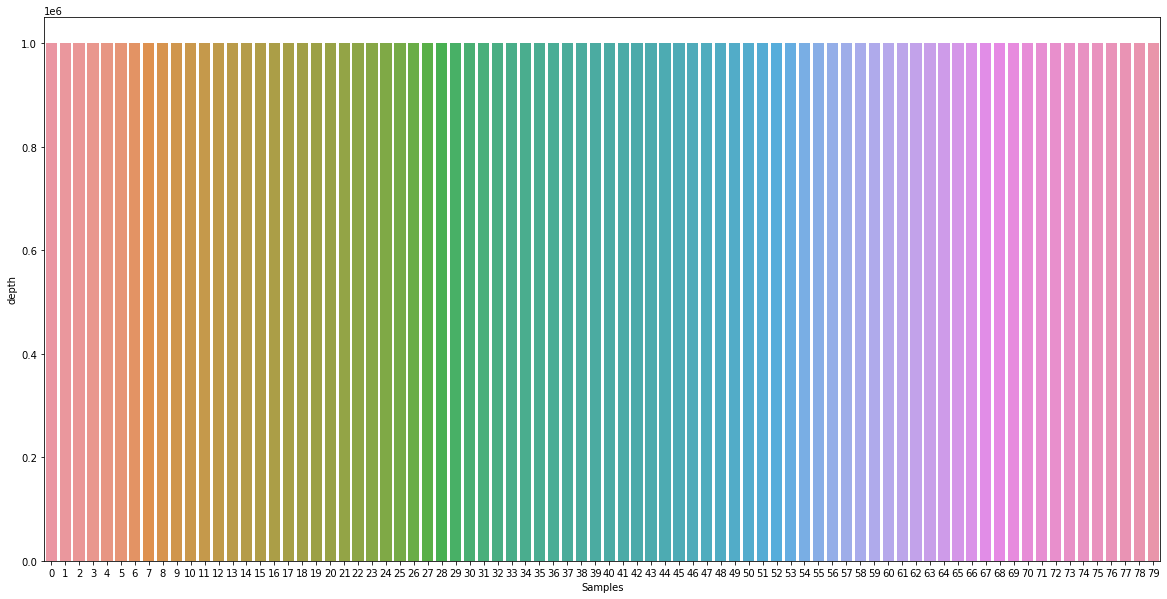

In [9]:
depth = pd.DataFrame({'Samples':list(range(0,80)), 'depth':transcriptomics.sum()})
plt.figure(figsize=(20,10))
ax =sns.barplot( data=depth, y='depth', x="Samples")

Do not need to normalized

f)

In [10]:
X = transcriptomics.T.to_numpy(dtype=float)
pca = PCA(n_components=3)
pca_output = pca.fit_transform(X)
pca_output_df = pd.DataFrame(pca_output, columns=['PCA1', 'PCA2', 'PCA3'])
pca_output_df["groups"] = dict_sample.values()


fig = px.scatter_3d(pca_output_df, x='PCA1', y='PCA2', z='PCA3', color="groups")
fig.show()

g)

In [11]:
transcriptomics_transf = np.log2(1+transcriptomics)
transcriptomics_transf

,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,Sample_10_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
Gene_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,4.247928,3.700440,3.321928,4.392317,3.321928,3.807355,4.392317,3.169925,2.321928,3.0,...,3.321928,3.321928,4.954196,3.321928,4.584963,4.087463,2.000000,3.906891,3.584963,4.087463
ENSG00000000005,0.000000,0.000000,0.000000,1.584963,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,1.000000,4.906891,1.584963,4.523562,2.000000,0.000000,1.584963,0.000000,2.584963
ENSG00000000419,3.459432,3.321928,3.321928,3.169925,3.459432,3.459432,2.807355,5.169925,3.807355,4.0,...,2.000000,3.321928,3.321928,4.000000,3.169925,3.321928,3.321928,2.321928,4.087463,2.584963
ENSG00000000457,0.000000,3.584963,0.000000,2.807355,1.584963,3.700440,3.584963,1.000000,1.584963,0.0,...,3.321928,3.169925,3.169925,2.584963,2.807355,0.000000,3.700440,3.807355,2.321928,3.584963
ENSG00000000460,0.000000,0.000000,3.906891,2.321928,2.584963,0.000000,0.000000,2.807355,2.321928,0.0,...,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,2.321928,0.000000,3.459432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273485,0.000000,0.000000,0.000000,1.000000,0.000000,2.584963,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.700440,0.000000,0.000000,0.000000,0.000000
ENSG00000273486,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,1.584963,0.000000,2.000000,0.000000,1.584963,2.584963,1.000000,0.000000,0.000000
ENSG00000273487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


h)

In [12]:
X = transcriptomics_transf.T.to_numpy(dtype=float)
pca = PCA(n_components=3)
pca_output_log = pca.fit_transform(X)
pca_output_log_df = pd.DataFrame(pca_output_log, columns=['PCA1', 'PCA2', 'PCA3'])
pca_output_log_df["groups"] =dict_sample.values()

fig = px.scatter_3d(pca_output_log_df, x='PCA1', y='PCA2', z='PCA3', color="groups")
fig.show()

Transformed data has better cluster

### 2. Differential gene expression

In [13]:
de_results = pd.DataFrame(index = transcriptomics.index, columns = ["pval","fdr","log2_mean_preadipo","log2_mean_adipo","log2_fold_change"])

a)

In [14]:
pvalue=[]
Adipo_samples = {i for i in dict_sample if dict_sample[i]=="Adipo"}
PreAdipo_samples = {i for i in dict_sample if dict_sample[i]=="PreAdipo"}

for index, gene in transcriptomics_transf.iterrows():
    _, pval = ttest_ind(gene[Adipo_samples], gene[PreAdipo_samples], equal_var=False)
    # _, pval =(ttest_ind(gene[0:40], gene[40:80], equal_var=False))
    pvalue.append(pval)
de_results["pval"] = pvalue

t_f, fdr_corrected_p_values = fdrcorrection(de_results.pval)
de_results.fdr = fdr_corrected_p_values

2.c)

In [15]:
de_results[de_results["fdr"] >= 0.05]

,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change
Gene_ID,,,,,
ENSG00000000003,0.029213,0.124449,NaN,NaN,NaN
ENSG00000000419,0.436098,0.605981,NaN,NaN,NaN
ENSG00000000457,0.371879,0.541478,NaN,NaN,NaN
ENSG00000000460,0.403271,0.574002,NaN,NaN,NaN
ENSG00000001167,0.032582,0.135853,NaN,NaN,NaN
...,...,...,...,...,...
ENSG00000273483,1.000000,1.000000,NaN,NaN,NaN
ENSG00000273485,0.767912,0.863298,NaN,NaN,NaN
ENSG00000273486,0.104262,0.314575,NaN,NaN,NaN


##### 2.d)

In [16]:
Adipo_samples = {i for i in dict_sample if dict_sample[i]=="Adipo"}
PreAdipo_samples = {i for i in dict_sample if dict_sample[i]=="PreAdipo"}

de_results["log2_mean_preadipo"] = np.log2(transcriptomics[PreAdipo_samples].mean(axis=1)+1)
de_results["log2_mean_adipo"] = np.log2(transcriptomics[Adipo_samples].mean(axis=1)+1)

##### 2.e)

In [17]:
de_results["log2_fold_change"] = (de_results["log2_mean_adipo"] - de_results["log2_mean_preadipo"])
de_results.sort_values('log2_fold_change', ascending=False, inplace=True)
de_results

,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change
Gene_ID,,,,,
ENSG00000170323,3.144794e-46,7.404844e-42,6.845176,13.011066,6.165889
ENSG00000130208,8.895025e-39,1.222581e-35,7.183883,13.134579,5.950695
ENSG00000055957,1.698795e-39,3.210511e-36,2.255501,7.901772,5.646271
ENSG00000122378,4.726720e-43,2.858531e-39,3.520422,9.164656,5.644233
ENSG00000135447,2.149862e-40,5.909776e-37,1.419539,6.984988,5.565449
...,...,...,...,...,...
ENSG00000089685,2.943092e-11,1.105506e-09,5.984703,3.083213,-2.901490
ENSG00000117399,2.514095e-07,4.778202e-06,4.842979,1.877744,-2.965235
ENSG00000149968,3.987162e-15,2.638158e-13,4.836682,1.827819,-3.008863


#### 2.f)

In [18]:
de_results.sort_values('log2_fold_change', ascending=False, inplace=True)
de_results = de_results[de_results["fdr"] < 0.05]
de_results = de_results[de_results["log2_fold_change"] > 1]
de_results

,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change
Gene_ID,,,,,
ENSG00000170323,3.144794e-46,7.404844e-42,6.845176,13.011066,6.165889
ENSG00000130208,8.895025e-39,1.222581e-35,7.183883,13.134579,5.950695
ENSG00000055957,1.698795e-39,3.210511e-36,2.255501,7.901772,5.646271
ENSG00000122378,4.726720e-43,2.858531e-39,3.520422,9.164656,5.644233
ENSG00000135447,2.149862e-40,5.909776e-37,1.419539,6.984988,5.565449
...,...,...,...,...,...
ENSG00000099785,2.521863e-09,7.002395e-08,4.346957,5.350497,1.003540
ENSG00000187824,1.747159e-07,3.423888e-06,3.617651,4.620586,1.002935
ENSG00000100412,8.848764e-08,1.817724e-06,4.499846,5.500643,1.000797



## 3. Investigating top marker genes
#### 3.a)

In [19]:
gene_annotation = pd.read_csv( os.path.join(core_path, 'Homo_sapiens.GRCh37.75.gene_annotation.txt'),sep= "\t")
gene_annotation.index = gene_annotation.Ensembl
gene_annotation2 = gene_annotation.loc[de_results.index,:]
de_results["gene_symbol"] = gene_annotation2.Name
de_results

,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change,gene_symbol
Gene_ID,,,,,,
ENSG00000170323,3.144794e-46,7.404844e-42,6.845176,13.011066,6.165889,FABP4
ENSG00000130208,8.895025e-39,1.222581e-35,7.183883,13.134579,5.950695,APOC1
ENSG00000055957,1.698795e-39,3.210511e-36,2.255501,7.901772,5.646271,ITIH1
ENSG00000122378,4.726720e-43,2.858531e-39,3.520422,9.164656,5.644233,FAM213A
ENSG00000135447,2.149862e-40,5.909776e-37,1.419539,6.984988,5.565449,PPP1R1A
...,...,...,...,...,...,...
ENSG00000099785,2.521863e-09,7.002395e-08,4.346957,5.350497,1.003540,MARCH2
ENSG00000187824,1.747159e-07,3.423888e-06,3.617651,4.620586,1.002935,TMEM220
ENSG00000100412,8.848764e-08,1.817724e-06,4.499846,5.500643,1.000797,ACO2


#### 3.b)

In [20]:
gene_annotation3 = gene_annotation.loc[transcriptomics.index,:]
transcriptomics_annotate = pd.concat([transcriptomics, gene_annotation3.Name], axis=1)
transcriptomics_annotate


,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,Sample_10_preadi,...,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo,Name
Gene_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,18,12,9,20,9,13,20,8,4,7,...,9,30,9,23,16,3,14,11,16,TSPAN6
ENSG00000000005,0,0,0,2,0,0,0,0,0,0,...,1,29,2,22,3,0,2,0,5,TNMD
ENSG00000000419,10,9,9,8,10,10,6,35,13,15,...,9,9,15,8,9,9,4,16,5,DPM1
ENSG00000000457,0,11,0,6,2,12,11,1,2,0,...,8,8,5,6,0,12,13,4,11,SCYL3
ENSG00000000460,0,0,14,4,5,0,0,6,4,0,...,0,3,0,1,0,1,4,0,10,C1orf112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273485,0,0,0,1,0,5,0,0,0,0,...,0,0,0,0,12,0,0,0,0,RP11-225H22.7
ENSG00000273486,0,0,0,0,1,0,0,0,0,0,...,2,0,3,0,2,5,1,0,0,RP11-731C17.2
ENSG00000273487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,RP4-621B10.8


In [21]:
pca_output_log_df["top_marker_gene_expression"] = np.array(transcriptomics.loc['ENSG00000170323'])
pca_output_log_df["top_marker_gene_expression"] = pca_output_log_df["top_marker_gene_expression"].astype(float)

In [22]:
def top_marker_gene_plot (df, column_name, Ensembl_name, Gene_symbol):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Expression of the top marker gene " + Ensembl_name + " of gene symbol " +Gene_symbol )

    #ax1 = ax1.axes(projection ="3d")
    ax1 = fig.add_subplot(2, 2, 2, projection='3d')
    ax1.scatter3D(df['PCA1'], df['PCA2'], df['PCA3'], c =df[column_name])#, cmap=cmap)

    ax2 = fig.add_subplot(2, 2, 1)
    ax2 = sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df[column_name] , cmap=cmap)
    fig.show()


<ipython-input-22-9d2ca4949a6c>:11: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



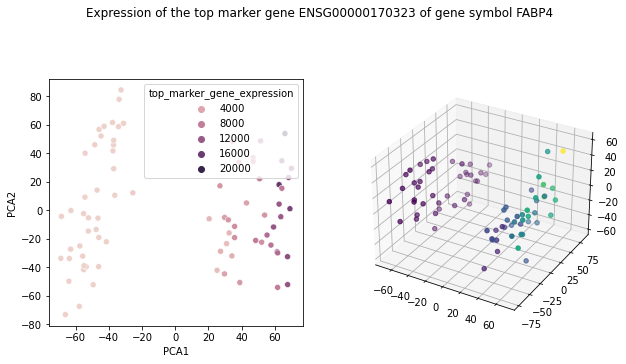

In [23]:
name = transcriptomics_annotate.loc["ENSG00000170323"].Name
cmap= sns.color_palette("rocket", as_cmap=True)
top_marker_gene_plot(pca_output_log_df,"top_marker_gene_expression", "ENSG00000170323", name)

3.d

In [24]:
Adipo_samples = {i for i in dict_sample if dict_sample[i]=="Adipo"}
PreAdipo_samples = {i for i in dict_sample if dict_sample[i]=="PreAdipo"}

up_down_reg = pd.DataFrame(index = transcriptomics.index, columns = ["log2_mean_preadipo","log2_mean_adipo","log2_fold_change"])

up_down_reg["log2_mean_preadipo"] = np.log2(transcriptomics[PreAdipo_samples].mean(axis=1)+1)
up_down_reg["log2_mean_adipo"] = np.log2(transcriptomics[Adipo_samples].mean(axis=1)+1)
up_down_reg["log2_fold_change"] = (up_down_reg["log2_mean_adipo"] - up_down_reg["log2_mean_preadipo"])
up_reg = up_down_reg.sort_values('log2_fold_change', ascending=False).iloc[:20]
down_reg = up_down_reg.sort_values('log2_fold_change', ascending=True).iloc[:20]


In [30]:
list(up_reg.index)

['ENSG00000170323',
 'ENSG00000130208',
 'ENSG00000055957',
 'ENSG00000122378',
 'ENSG00000135447',
 'ENSG00000181856',
 'ENSG00000175445',
 'ENSG00000103723',
 'ENSG00000123689',
 'ENSG00000167588',
 'ENSG00000091513',
 'ENSG00000131471',
 'ENSG00000170262',
 'ENSG00000181092',
 'ENSG00000064886',
 'ENSG00000130203',
 'ENSG00000187288',
 'ENSG00000138207',
 'ENSG00000174697',
 'ENSG00000166819']

In [103]:
def ensembl_name_to_gene_name(ensembl_name):
    return transcriptomics_annotate.loc[ensembl_name].Name

In [119]:
list(preadipo.columns[:-1])

['ENSG00000170323',
 'ENSG00000130208',
 'ENSG00000055957',
 'ENSG00000122378',
 'ENSG00000135447',
 'ENSG00000181856',
 'ENSG00000175445',
 'ENSG00000103723',
 'ENSG00000123689',
 'ENSG00000167588',
 'ENSG00000091513',
 'ENSG00000131471',
 'ENSG00000170262',
 'ENSG00000181092',
 'ENSG00000064886',
 'ENSG00000130203',
 'ENSG00000187288',
 'ENSG00000138207',
 'ENSG00000174697',
 'ENSG00000166819',
 'ENSG00000214100',
 'ENSG00000264433',
 'ENSG00000149968',
 'ENSG00000117399',
 'ENSG00000089685',
 'ENSG00000196611',
 'ENSG00000115884',
 'ENSG00000166803',
 'ENSG00000186193',
 'ENSG00000205362',
 'ENSG00000250038',
 'ENSG00000079462',
 'ENSG00000114270',
 'ENSG00000158270',
 'ENSG00000109881',
 'ENSG00000188064',
 'ENSG00000135451',
 'ENSG00000148773',
 'ENSG00000163739',
 'ENSG00000150551']

In [196]:
preadipo = transcriptomics[PreAdipo_samples].T[list(up_reg.index) + list(down_reg.index)]
preadipo['label'] = 40*['PreAdipo']
adipo = transcriptomics[Adipo_samples].T[list(up_reg.index) + list(down_reg.index)]
adipo['label'] = 40*['Adipo']
cluster_df = pd.concat([preadipo, adipo], axis = 0)
genes = [ensembl_name_to_gene_name(name) for name in preadipo.columns[:-1]]
cluster_df.rename(columns = dict(zip(list(preadipo.columns[:-1]),  genes)), inplace = True)
cluster_df

Gene_ID,FABP4,APOC1,ITIH1,FAM213A,PPP1R1A,SLC2A4,LPL,AP3B2,G0S2,GPD1,...,PAFAH1B3,COL7A1,COLEC12,CCDC34,WNT7B,TROAP,MKI67,CXCL1,LYPD1,label
Sample_10_preadi,52,95,4,2,0,0,17,0,130,10,...,25,40,0,57,1,3,0,6,1,PreAdipo
Sample_31_preadi,114,132,2,8,1,2,6,0,166,22,...,46,8,13,56,0,0,8,0,6,PreAdipo
Sample_4_preadi,107,158,4,15,0,0,7,0,40,24,...,38,32,56,124,5,15,83,36,8,PreAdipo
Sample_19_preadi,218,286,5,6,3,22,15,2,86,32,...,41,71,20,122,6,23,58,14,10,PreAdipo
Sample_16_preadi,89,119,3,3,1,0,6,1,19,18,...,50,17,59,174,6,17,60,26,14,PreAdipo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_61_adipo,3293,5474,120,502,42,227,209,13,2078,706,...,14,1,5,12,0,3,5,0,1,Adipo
Sample_76_adipo,5547,5168,172,470,88,80,709,54,2349,929,...,7,12,0,6,0,3,6,0,0,Adipo
Sample_80_adipo,2961,3219,116,247,29,103,143,26,815,336,...,2,6,4,23,0,1,11,0,0,Adipo
Sample_55_adipo,20950,12387,286,437,265,88,892,63,4790,609,...,0,17,7,34,0,0,3,0,1,Adipo


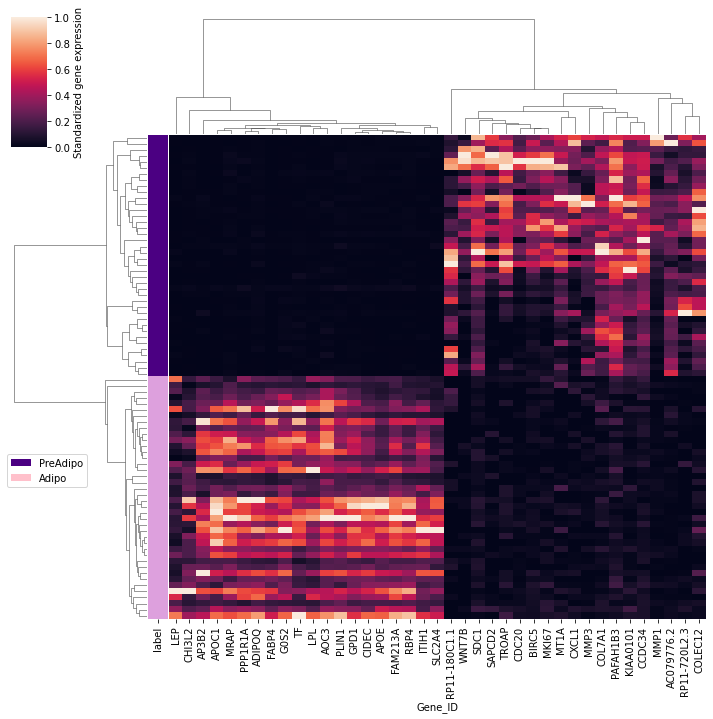

In [197]:
labels = cluster_df.pop("label")
lut = dict(zip(labels.unique(), ["indigo", "plum"]))
row_colors = labels.map(lut)
sns.clustermap(cluster_df.iloc[:,:-1], standard_scale=1, row_colors=row_colors, metric = "correlation", cbar_kws = {"label": "Standardized gene expression"}, xticklabels=True, yticklabels= False)
legend_elements = [Patch(facecolor='indigo',
                         label='PreAdipo'),
                   Patch(facecolor='pink',
                         label='Adipo')]

plt.legend(handles=legend_elements, loc = "center", bbox_to_anchor = (1,-2.5))

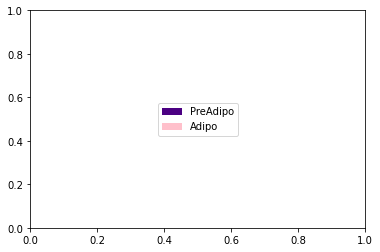

In [163]:
legend_elements = [Patch(facecolor='indigo',
                         label='PreAdipo'),
                   Patch(facecolor='pink',
                         label='Adipo')]

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='center')